$\langle \hat{S^x}\rangle\vert_t$ over frequncies

# Define functions

In [15]:
def drive(t, args):
    h0, h, w = args['h0'], args['h'], args['omega']
    return h0 + h * np.cos(w * t)

def get_ham_tss(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                    # kacNorm
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1,sx,sy,sz

def run_dynm_tss(w,N):
    h = 1/4 * freezing_pts[0] * w
    params = {'h0':np.pi/32, 'h':h, 'omega':w}
    T = 2 * np.pi/w
    times = np.linspace(0,30*T,200)
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = H1.eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, max(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N)], args = params)
    return np.average(out.expect)

def run_sx_tss(h,w,N):
    params = {'h0':np.pi/32, 'h':h, 'omega':w}
    T = 2 * np.pi/w
    times = np.linspace(0,30*T,200)
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = H1.eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, max(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N)], args = params)
    return np.average(out.expect)

print("Funcs defined !")

Funcs defined !


In [ ]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)


plt.rcParams.update({"figure.figsize": (10, 6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 13,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.00})



if __name__ == '__main__':
    nprocs = 2       
    N = 2              #total spin in TSS
    h0 = np.pi/32
    ws = np.linspace(1,90,100)
    
    p = Pool(processes = nprocs)
    print("running for TSS spin=",N," with", nprocs," processors!")
    
    data = np.array(p.starmap(run_dynm_tss,tqdm([(w,N) for w in ws])))
    
    plt.plot(ws, data)
    plt.ylabel(r"$\overline{\langle S^x \rangle}$")
    plt.xlabel(r"$\omega$")
    plt.tick_params(which='both', axis="x", direction="in")
    plt.tick_params(which='both', axis="y", direction="in")
    plt.show()

#### Multiple N

running for TSS spin= 10  with 2  processors!
running for TSS spin= 20  with 2  processors!


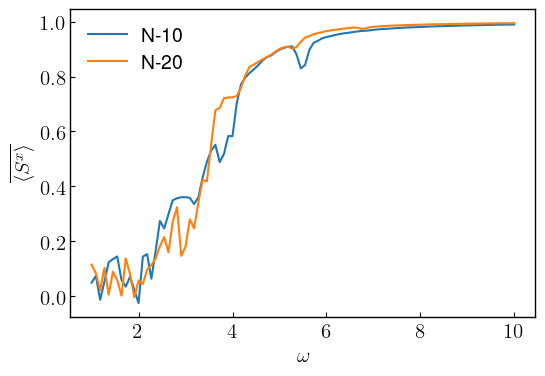

CPU times: user 357 ms, sys: 78.1 ms, total: 435 ms
Wall time: 35 s


In [9]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)


plt.rcParams.update({"figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.00})



if __name__ == '__main__':
    nprocs = 2       
    Ns = [10,20]              #total spin in TSS
    h0 = np.pi/32
    ws = np.linspace(1,10,100)
    
    for nn,N in enumerate(Ns):
        p = Pool(processes = nprocs)
        print("running for TSS spin=",N," with", nprocs," processors!")

        data = np.array(p.starmap(run_dynm_tss,[(w,N) for w in ws]))
        plt.plot(ws, data, label = fr"N-{N}")
        
    plt.ylabel(r"$\overline{\langle S^x \rangle}$")
    plt.xlabel(r"$\omega$")
    plt.tick_params(which='both', axis="x", direction="in")
    plt.tick_params(which='both', axis="y", direction="in")
    plt.legend(frameon = False, fontsize = 14)
    #plt.savefig('sx_multN.jpeg',dpi = 600)
    #plt.savefig('sx_multN.svg',dpi = 600)
    plt.show()

In [18]:
def drive(t, args):
    h0, h, w = args['h0'], args['h'], args['omega']
    return h0 + h * np.cos(w * t)

def get_ham_tss(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                    # kacNorm
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1,sx,sy,sz

def run_dynm_tss(w,N):
    h = 1/4 * freezing_pts[0] * w
    params = {'h0':np.pi/32, 'h':h, 'omega':w}
    T = 2 * np.pi/w
    times = np.linspace(0,10000*T,50000)
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = H1.eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, max(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N)], args = params)
    return np.average(out.expect)

def run_sx_tss(h,w,N):
    opts = Options(nsteps=1e8)
    params = {'h0':np.pi/32, 'h':h, 'omega':w, 'opts':opts}
    T = 2 * np.pi/w
    times = np.linspace(0,200*T,5000)
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = H1.eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, max(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N)], args = params)
    return np.average(out.expect)

print("Funcs defined !")

Funcs defined !


In [19]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)
import h5py


plt.rcParams.update({"figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.00})



if __name__ == '__main__':
    nprocs = 10      
    Ns = [10, 8]              #total spin in TSS
    h0 = np.pi/32
    w = 90.0
    hss = w/4 * np.linspace(0, 16.0, 100)
    hhs = np.sort(np.append(hss, jn_zeros(0,5)))
    
    for nn,N in tqdm(enumerate(Ns)):
        p = Pool(processes = nprocs)

        datasx = np.array(p.starmap(run_sx_tss,[(h,w,N) for h in hhs]))
        fname = 'sx_avg_ws1_N' + str(N) + '.hdf5'

        with h5py.File(fname,'w') as hf:
            data = hf.create_dataset('datasx', np.shape(datasx), data = datasx)
            hs = hf.create_dataset('hhs', np.shape(hhs), data = hhs)
            hf.attrs['N'] = N
            hf.attrs['w'] = w

2it [02:18, 69.41s/it]

CPU times: user 72 ms, sys: 199 ms, total: 271 ms
Wall time: 2min 18s


In [20]:
!ls sx_avg_ws1_N* >sx_avg_ws_datafiles.txt

In [21]:
!cat sx_avg_ws_datafiles.txt

sx_avg_ws1_N10.hdf5
sx_avg_ws1_N20.hdf5
sx_avg_ws1_N50.hdf5
sx_avg_ws1_N8.hdf5


sx_avg_ws1_N10.hdf5
sx_avg_ws1_N20.hdf5
sx_avg_ws1_N50.hdf5


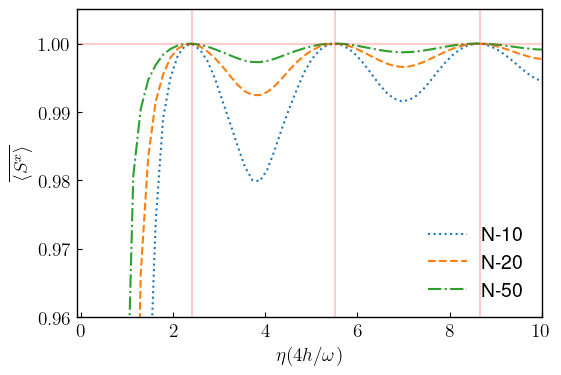

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn_zeros

plt.rcParams.update({"figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 14,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black"})

linest = ['dotted', 'dashed', 'dashdot','solid']
with open('sx_avg_ws_datafiles.txt') as df:
    lines = df.readlines()
    xx = len(lines)
    for xxi in range(xx):
        filename = lines[xxi][:-1]
        print(filename)
        
        with h5py.File(filename, "r") as f:
            data = f['datasx'][()]
            hs = f['hhs'][()]
            N = f.attrs['N']
            w = f.attrs['w']
            plt.plot(4*hs/w, data, label = fr"N-{N}", linestyle= linest[xxi])
            
    for xx in range(5):
        plt.axvline(x=jn_zeros(0,5)[xx],  color = 'red', alpha = 0.2)
        
    plt.ylabel(r"$\overline{\langle S^x \rangle}$")
    plt.xlabel(r"$\eta(4h/\omega)$")
    plt.tick_params(which='both', axis="x", direction="in")
    plt.tick_params(which='both', axis="y", direction="in")
    plt.legend(frameon = False, loc= 4)
    #plt.savefig('sx_multN.jpeg',dpi = 600)
    #plt.savefig('sx_multN.svg',dpi = 600)
    plt.ylim(.96,1.005)
    plt.xlim(-.1,10)
    plt.axhline(y=1.0, color = 'red', alpha = 0.2)
    plt.savefig('sx_conservation.jpeg', dpi= 600)
    plt.savefig('sx_conservation.svg', dpi= 600)
    plt.show()